<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: 'Arial', sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 0;
        }
        h1 {
            background-color:rgb(113, 180, 177);
            color: #ecf0f1;
            padding: 20px;
            text-align: center;
        }
        h2 {
            color:rgb(69, 146, 111);
            font-size: 1.8rem;
            margin-bottom: 15px;
            border-bottom: 2px solidrgb(104, 135, 167);
            padding-bottom: 5px;
        }
        h3, h4 {
            font-size: 1.3rem;
            color:rgb(137, 184, 228);
        }
        ul {
            list-style-type: none;
            padding-left: 0;
        }
        li {
            margin: 10px 0;
            font-size: 1.1rem;
        }
        .highlight {
            font-weight: bold;
            color: #e74c3c;
        }
    </style>
</head>
<body>

# 🏆 Football Player Detection and Tracking ⚽️

---

## Business Objective 🎯


Visualize player and ball trajectories on a 2D tactical field  to optimize performance analysis and scouting processes for football teams.

---

## Dataset: Match Videos 🎥

### Objectives

#### 1. Match Performance Analysis 🔍
- **Track player movements on the field:**  
  Use advanced computer vision techniques to monitor and analyze player positioning, speed, and movement patterns during the match.
  
- **Identify key actions (shots, assists, successful dribbles):**  
  Implement action recognition algorithms to detect and log critical events such as shots on goal, assists, and successful dribbles.


#### 2. Player Recognition and Tracking 🏃‍♂️🔍
- **Apply a computer vision model to identify players:**  
  Use object detection and deep learning models to recognize individual players based on jersey colors, numbers, and other visual features.

- **Track player and ball trajectories:**  
  Continuously monitor and record the paths of players and the ball to provide insights into team dynamics and individual performance.

- **Detect opposing team tactical patterns:**  
  Analyze the tactical formations and strategies of the opposing team to identify recurring patterns and potential weaknesses.



## Proposed Solution Workflow 🛠️

1. **Data Collection:**  
   Gather high-quality match and training videos. 📹

2. **Preprocessing:**  
   Clean and annotate video data for model training. 🧹

3. **Model Development:**  
   Train computer vision models for player detection, tracking, and action recognition. 🤖

4. **Tactical Visualization:**  
   Display player and ball movements on a 2D tactical field. 🗺️

5. **Performance Analysis:**  
   Generate reports and insights for coaches and analysts. 📊

6. **Strategy Optimization:**  
   Provide recommendations for tactical adjustments based on data-driven insights. 💡

---

## Expected Outcomes 🎯

- **Enhanced player performance analysis** through detailed tracking and action recognition. 📊
- **Improved scouting and recruitment processes** using data-driven insights. 🕵️‍♂️
- **Better tactical decision-making** through opponent analysis and strategy optimization. ⚔️
- **Real-time or post-match visualization** of player and ball movements for coaching staff. 📈

---

</body>
</html>


<h2 style="font-size: 1.5rem;">⚙️ Step 1: Importing Libraries</h2>


In [1]:
import cv2
import os
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt


<h2 style="font-size: 1.5rem;">⚙️ Step 2: 📊 Importing Dataset</h2>


In [2]:
# Path to the folder containing videos
video_folder = "data video"

# Get list of video files
videos = sorted([f for f in os.listdir(video_folder) if f.endswith(".mp4")])

print(f"Number of videos found: {len(videos)}")
print("Examples:", videos[:5])  # Display first 5 video names


Number of videos found: 134
Examples: ['0.mp4', '100.mp4', '101.mp4', '102.mp4', '103.mp4']


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Styled Title</title>
    <style>
        h2 {
            font-size: 1.5rem;
            color: #333;
            text-align: center;
        }
    </style>
</head>
<body>

    Interpretation :

</body>
</html>



<h2 style="font-size: 1.5rem;">📂 Path to the Folder Containing Videos and File Listing 🎥</h2>

The code successfully identified the path to the folder containing the video files and retrieved a sorted list of `.mp4` video files. 



The script efficiently lists and sorts the `.mp4` video files available in the `data video` directory, providing a clear overview of the available files.



<h2 style="font-size: 1.5rem;">🔄 Importing and Loading YOLO11n Model</h2>

In this step, we import the necessary package and load the pre-trained YOLO11n model for object detection.

### Code Explanation:
- **Importing YOLO from the Ultralytics package**: We import the `YOLO` class from the `ultralytics` module.
- **Loading the pre-trained YOLO11n model**: We load the YOLO11n model (`yolov8n.pt`) which has been pre-trained on a large dataset and is ready for inference.


In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")



In [4]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

<h2 style="color: #2ecc71; font-size: 1.5rem;">🎬 Choose Video for Visualization</h2>

In this section, we select a specific video from the list of available videos and extract important properties for further processing.




In [5]:
import cv2
import numpy as np

# Choose the video
video_name = videos[62]  
video_path = os.path.join(video_folder, video_name)




### Code Explanation:
1. **Select Video**: We choose a video from the list of videos using its index (`videos[ ]`).
2. **Get Video Path**: We construct the full path to the selected video file.
3. **Open Video**: The `cv2.VideoCapture()` function is used to open the selected video for processing.
4. **Retrieve Video Properties**:
   - **FPS (Frames Per Second)**: We extract the FPS of the video to determine the playback speed.
   - **Frame Width and Height**: The dimensions of the video frames are obtained to understand the resolution.


<h2 style="color:rgb(235, 204, 114);font-size: 1.5rem;">🔧Football Match Analysis with YOLO11n</h2>

<h2 style="color:rgba(246, 231, 187, 0.82);font-size: 1.5rem;">Overview</h2>

We use YOLO11n for detecting football players, goalkeepers, and the ball in a video. The goal is to create a tactical overview of the football match by mapping detected player and ball positions onto a simplified football pitch. It also tracks player movements and the trajectory of the ball using computer vision techniques.

<h2 style="color:rgba(210, 246, 187, 0.82);font-size: 1.5rem;">Key Steps and Components</h2>

#### 1. **Importing Required Libraries**
   - **cv2**: OpenCV for video processing, object detection, and visualization.
   - **numpy**: Used for handling arrays and manipulating image data.
   - **time**: Used to track time intervals between frames for processing speed.
   - **defaultdict**: A specialized dictionary to track player positions.
   - **YOLO (Ultralytics)**: The YOLO11n model is used to detect objects (players and ball).

#### 2. **Loading YOLO11n Model**
   - The YOLO11n model is loaded from the specified path (`'YOLO11nn.pt'`). It is used to detect players and the ball in each frame of the video.

#### 3. **Defining Team Colors**
   - **Team 1**: Blue (BGR format: `(255, 0, 0)`)
   - **Team 2**: Yellow (BGR format: `(0, 255, 255)`)
   - **Goalkeeper**: Cyan (BGR format: `(255, 255, 0)`)
   - The **ball** color is set to Red (BGR format: `(0, 0, 255)`).

#### 4. **Creating the Tactical Overview Pitch**
   - A blank image (`tactical_pitch`) is created to represent the football pitch.
   - Markings are drawn, including the outer boundary, halfway line, and center circle.

#### 5. **Opening the Video**
   - The video file is opened using OpenCV's `cv2.VideoCapture()`. The program checks if the video has opened successfully.

#### 6. **Initializing Tracking Variables**
   - **`previous_positions`**: Dictionary to store the last known positions of players.
   - **`previous_time`**: Stores the previous frame's timestamp to calculate frame interval.
   - **`player_tracks`**: A `defaultdict` to store player tracking data (positions and team).
   - **`ball_trajectory`**: List to track the ball's movement across frames.
   - **`next_id`**: Used to assign unique IDs to players.
   - **`fps` and `frame_skip`**: Set the frame rate and the frequency of frame processing (every 5th frame to reduce load).

#### 7. **Detecting Team Based on Color**
   - A function `detect_team_color()` is used to determine a player's team based on their shirt color. The function works in the HSV color space to identify:
     - **Blue** for Team 1
     - **Yellow** for Team 2
     - **Cyan** for Goalkeeper

#### 8. **Processing Each Frame**
   - Each frame is processed:
     - **YOLO Detection**: YOLO11n is used to detect players and the ball.
     - **Bounding Boxes and Labels**: Bounding boxes are drawn around detected objects (players and ball), and labels are added (e.g., "Team 1", "Ball").
     - **Team Assignment**: Players are assigned to teams based on the dominant color in their bounding box.
     - **Tracking Players**: Each player’s position is tracked across frames using a simple distance threshold to match previous positions.
     - **Ball Tracking**: The ball's position is tracked, and its trajectory is recorded for visualization.

#### 9. **Mapping Positions to Tactical Overview**
   - The positions of players and the ball are mapped to the simplified tactical pitch:
     - **Players**: Represented by small circles on the pitch in their respective team colors.
     - **Ball**: Represented by a red circle on the pitch.
   
#### 10. **Displaying Frames**
   - The processed frames (video with bounding boxes) and the tactical overview are displayed using OpenCV’s `imshow()` function.
   - Press **'q'** to stop the video playback and close the windows.

#### 11. **Releasing Resources**
   - After the video finishes or when the user stops the playback, the resources (video file and OpenCV windows) are released using `cap.release()` and `cv2.destroyAllWindows()`.

<h2 style="color:rgb(111, 154, 218);font-size: 1.5rem;">Conclusion</h2>
This section of the project provides real-time football match analysis by detecting players, goalkeepers, and the ball using YOLO11n. It also visualizes the detected positions on a tactical pitch, providing insights into player movements and ball trajectory throughout the match.


🧼 Part 1: Video Preprocessing, Noise Reduction & Detection Configuration

In [10]:
import cv2
import numpy as np
import time
import csv
from datetime import datetime
from collections import defaultdict
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.image as mpimg  # Import the correct module for reading images


# Setup
team_colors = {"Team 1": (255, 0, 0), "Team 2": (0, 255, 255), "Goalkeeper": (255, 255, 0)}
ball_color = (255, 0, 0)

pitch_width, pitch_height = 600, 400
tactical_pitch = np.zeros((pitch_height, pitch_width, 3), dtype=np.uint8)
tactical_pitch[:] = (34, 139, 34)
cv2.rectangle(tactical_pitch, (50, 50), (pitch_width - 50, pitch_height - 50), (255, 255, 255), 2)
cv2.line(tactical_pitch, (pitch_width // 2, 50), (pitch_width // 2, pitch_height - 50), (255, 255, 255), 2)
cv2.circle(tactical_pitch, (pitch_width // 2, pitch_height // 2), 50, (255, 255, 255), 2)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("❌ Error: Could not open video file!")
    exit()

player_tracks = defaultdict(lambda: {'positions': [], 'team': None, 'last_speed': 0})
ball_trajectory = []
ball_speeds = []
y_pred, y_true = [], []
next_id, frame_count = 2, 0
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_skip = 6

# CSV Setup
csv_file = "detections.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Time", "Team", "Player ID", "Position X", "Position Y", "Ball Speed (km/h)", "Player Speed (km/h)", "Goal"])

def detect_team_color(frame, x1, y1, x2, y2):
    player_roi = frame[y1:y2, x1:x2]
    hsv_roi = cv2.cvtColor(player_roi, cv2.COLOR_BGR2HSV)
    blue = cv2.inRange(hsv_roi, np.array([100, 150, 50]), np.array([140, 255, 255]))
    yellow = cv2.inRange(hsv_roi, np.array([20, 100, 100]), np.array([40, 255, 255]))
    cyan = cv2.inRange(hsv_roi, np.array([85, 150, 50]), np.array([95, 255, 255]))
    counts = {'Team 1': np.sum(blue), 'Team 2': np.sum(yellow), 'Goalkeeper': np.sum(cyan)}
    return max(counts, key=counts.get) if max(counts.values()) > 0 else "Unknown"

def calculate_player_speed(pid, pos, smoothing=0.5):
    last = player_tracks[pid]['positions'][-2] if len(player_tracks[pid]['positions']) > 1 else pos
    dist = np.linalg.norm(np.array(pos) - np.array(last))
    speed = dist * fps
    prev = player_tracks[pid]['last_speed']
    player_tracks[pid]['last_speed'] = smoothing * speed + (1 - smoothing) * prev
    return player_tracks[pid]['last_speed']

def calculate_ball_speed(trajectory, smoothing=0.5):
    if len(trajectory) < 2:
        return 0
    recent = trajectory[-5:]
    dists = [np.linalg.norm(np.array(recent[i+1]) - np.array(recent[i])) for i in range(len(recent)-1)]
    avg = np.mean(dists) if dists else 0
    return avg * fps * 0.1 * 3.6


⚽ Part 2: Detection, Tracking, Visualization & Metricssation

🎬 Video finished.


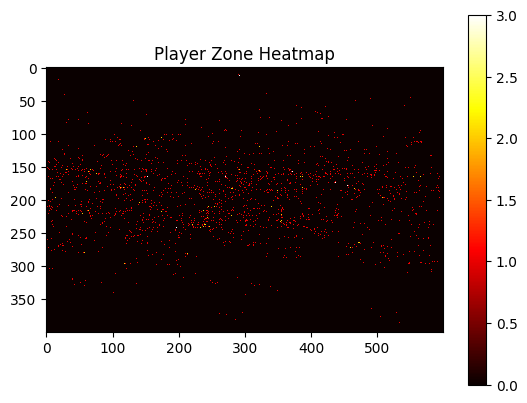

✅ Trimmed lengths to match: y_true = 4033, y_pred = 4033

📊 Detection Metrics Summary:
🔹 Player - Precision: 0.99, Recall: 0.99, F1-Score: 0.99
🔹 Ball - Precision: 0.07, Recall: 0.07, F1-Score: 0.07

✅ Overall Accuracy: 0.98


C:\Users\ameni\AppData\Local\Temp\ipykernel_45052\3094701354.py:172: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels)
C:\Users\ameni\AppData\Local\Temp\ipykernel_45052\3094701354.py:178: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ameni\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


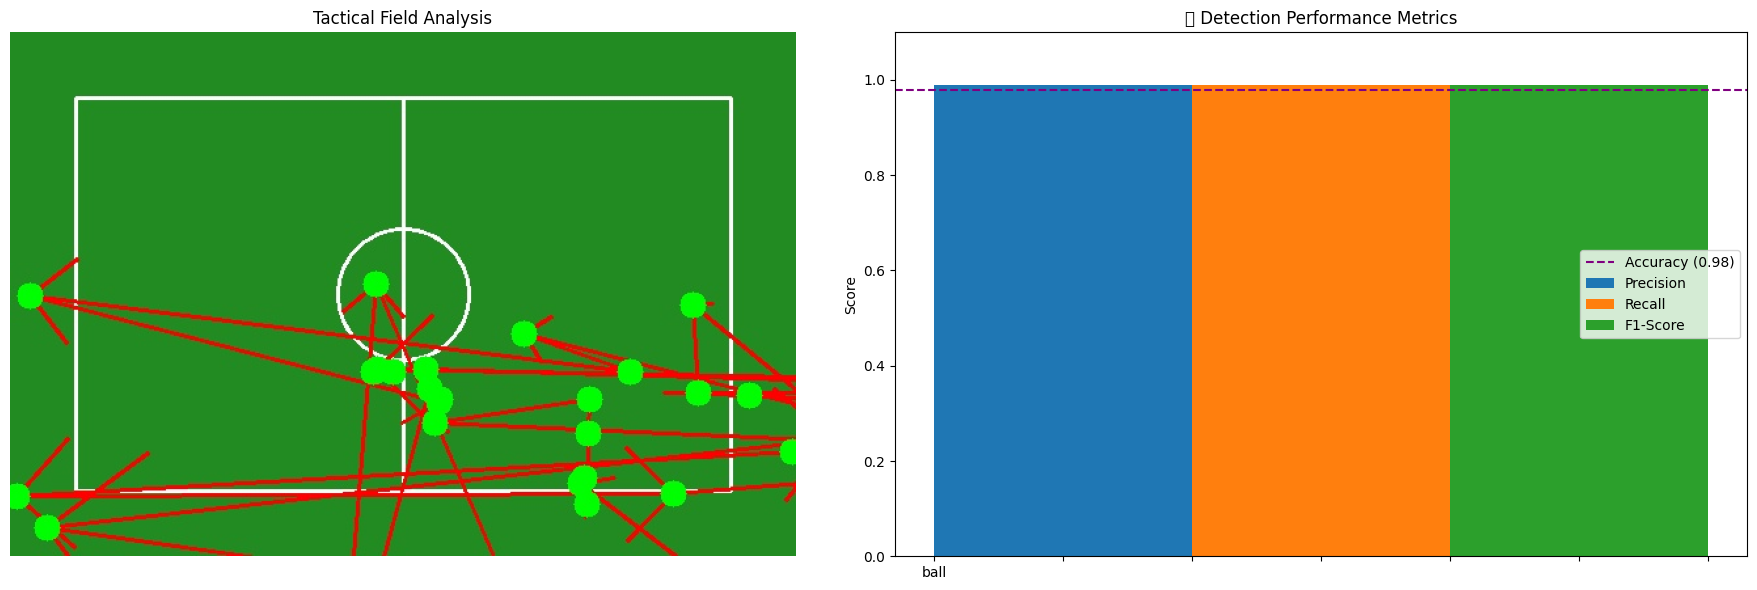

In [12]:
# Process video frames
while True:
    ret, frame = cap.read()
    if not ret:
        print("🎬 Video finished.")
        break

    frame_count += 1
    if frame_count % frame_skip != 0:
        continue

    frame = cv2.resize(frame, (1000, 550))
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    results = model(blurred_frame)  # Apply model for object detection
    tactical_frame = tactical_pitch.copy()  # Reset tactical frame for each iteration

    for detection in results[0].boxes.data:
        x1, y1, x2, y2, conf, class_id = detection.tolist()
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
        object_id = int(class_id)

        if object_id == 0:  # Player detected
            y_pred.append('player')
            team = detect_team_color(frame, x1, y1, x2, y2)
            if team == "Unknown":
                continue
            color = team_colors[team]
            current_pos = (cx, cy)

            # Match player to previous tracks or create new ID
            matched_id = None
            for pid, data in player_tracks.items():
                last = data['positions'][-1] if data['positions'] else (0, 0)
                if np.linalg.norm(np.array(current_pos) - np.array(last)) < 50:
                    matched_id = pid
                    break
            if matched_id is None:
                matched_id = next_id
                next_id += 1
            player_tracks[matched_id]['positions'].append(current_pos)
            player_tracks[matched_id]['team'] = team
            spd_kmh = calculate_player_speed(matched_id, current_pos) * 0.105 * 3.6

            # Display speed and team on the frame
            cv2.putText(frame, f"Speed: {spd_kmh:.1f} km/h", (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            cv2.putText(frame, team, (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Map the player's position to the tactical field
            tx = int((cx / frame.shape[1]) * pitch_width)
            ty = int((cy / frame.shape[0]) * pitch_height)
            cv2.circle(tactical_frame, (tx, ty), 5, color, -1)  # Plot player on tactical field

            # Draw bounding box around player
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)

            # Write data to CSV file
            with open(csv_file, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([datetime.now().strftime("%Y-%m-%d %H:%M:%S"), team, matched_id, cx, cy, "", round(spd_kmh, 2), ""])

        elif object_id == 32:  # Ball detected
            y_pred.append('ball')
            ball_trajectory.append((cx, cy))
            bspeed = calculate_ball_speed(ball_trajectory)
            ball_speeds.append(bspeed)

            # Map the ball's position to the tactical field
            tx = int((cx / frame.shape[1]) * pitch_width)
            ty = int((cy / frame.shape[0]) * pitch_height)
            cv2.circle(tactical_frame, (tx, ty), 3, ball_color, -1)  # Plot ball on tactical field

            # Draw bounding box around ball
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(frame, f"Speed: {bspeed:.1f} km/h", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

            # Write ball data to CSV file
            with open(csv_file, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([datetime.now().strftime("%Y-%m-%d %H:%M:%S"), "", "", cx, cy, round(bspeed, 2), "", ""])

    # Display both the frame and the tactical field
    cv2.imshow("Frame", frame)
    cv2.imshow("Tactical Overview", tactical_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# Post-Processing: CSV Load for Zone Heatmap, Pass Arrows, and Player Coverage
positions = defaultdict(list)
with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Team'] and row['Player ID']:
            positions[row['Player ID']].append((float(row['Position X']), float(row['Position Y'])))

# Zone Heatmap
heatmap_data = np.zeros((pitch_height, pitch_width), dtype=np.uint8)
for player_id, player_positions in positions.items():
    for x, y in player_positions:
        x_mapped = int((x / 1000) * pitch_width)
        y_mapped = int((y / 550) * pitch_height)
        heatmap_data[y_mapped, x_mapped] += 1
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.title("Player Zone Heatmap")
plt.colorbar()
plt.show()

# Ball/Pass Movement Arrows
for i in range(1, len(ball_trajectory)):
    start_pos = ball_trajectory[i-1]
    end_pos = ball_trajectory[i]
    cv2.arrowedLine(tactical_frame, start_pos, end_pos, (0, 0, 255), 2)

# Highlight Key Events (Speed Spikes)
for i, spd in enumerate(ball_speeds):
    if spd > 50:  # Example threshold for speed spike
        tx, ty = ball_trajectory[i]
        cv2.circle(tactical_frame, (tx, ty), 10, (0, 255, 0), -1)

# Save final tactical frame
cv2.imwrite("final_tactical_analysis.jpg", tactical_frame)


# Load y_true from CSV
with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Team'] or row['Player ID']:
            y_true.append('player')
        elif row['Ball Speed (km/h)']:
            y_true.append('ball')

# Trim to match the lengths of y_true and y_pred
min_len = min(len(y_true), len(y_pred))
y_true = y_true[:min_len]
y_pred = y_pred[:min_len]
print(f"✅ Trimmed lengths to match: y_true = {len(y_true)}, y_pred = {len(y_pred)}")

# Evaluation
labels = ['player', 'ball']
precision = precision_score(y_true, y_pred, average=None, labels=labels)
recall = recall_score(y_true, y_pred, average=None, labels=labels)
f1 = f1_score(y_true, y_pred, average=None, labels=labels)
accuracy = accuracy_score(y_true, y_pred)

print("\n📊 Detection Metrics Summary:")
for i, label in enumerate(labels):
    print(f"🔹 {label.capitalize()} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-Score: {f1[i]:.2f}")
print(f"\n✅ Overall Accuracy: {accuracy:.2f}")



# Display tactical analysis image and metrics plot
tactical_img = mpimg.imread('final_tactical_analysis.jpg')
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the tactical image
axs[0].imshow(tactical_img)
axs[0].axis('off')  # Hide axes
axs[0].set_title("Tactical Field Analysis")
width = 0.2
# Plot the detection performance metrics
axs[1].bar(x - width, precision, width, label='Precision')
axs[1].bar(x, recall, width, label='Recall')
axs[1].bar(x + width, f1, width, label='F1-Score')
axs[1].axhline(accuracy, color='purple', linestyle='--', label=f'Accuracy ({accuracy:.2f})')
axs[1].set_xticklabels(labels)
axs[1].set_ylim(0, 1.1)
axs[1].set_ylabel("Score")
axs[1].set_title("📊 Detection Performance Metrics")
axs[1].legend()

plt.tight_layout()
plt.show()

GNN Model for Analyzing player movements and predict strategies or roles.


Epoch 1/12, Loss: 0.1286
Epoch 2/12, Loss: 0.0351
Epoch 3/12, Loss: 0.0284
Epoch 4/12, Loss: 0.0283
Epoch 5/12, Loss: 0.0281
Epoch 6/12, Loss: 0.0278
Epoch 7/12, Loss: 0.0276
Epoch 8/12, Loss: 0.0274
Epoch 9/12, Loss: 0.0273
Epoch 10/12, Loss: 0.0271
Epoch 11/12, Loss: 0.0270
Epoch 12/12, Loss: 0.0268


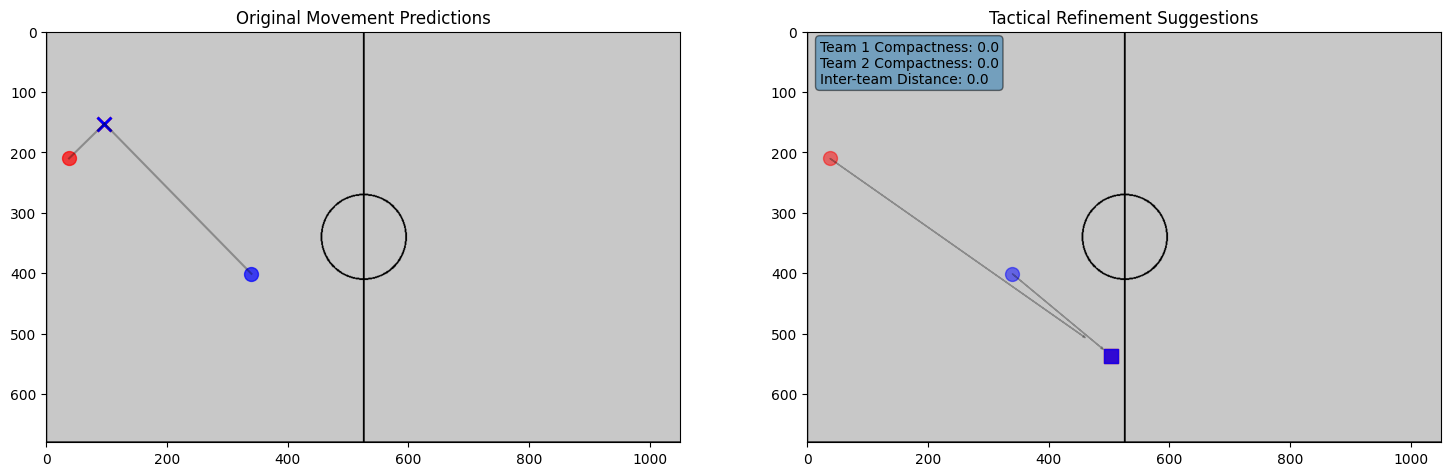

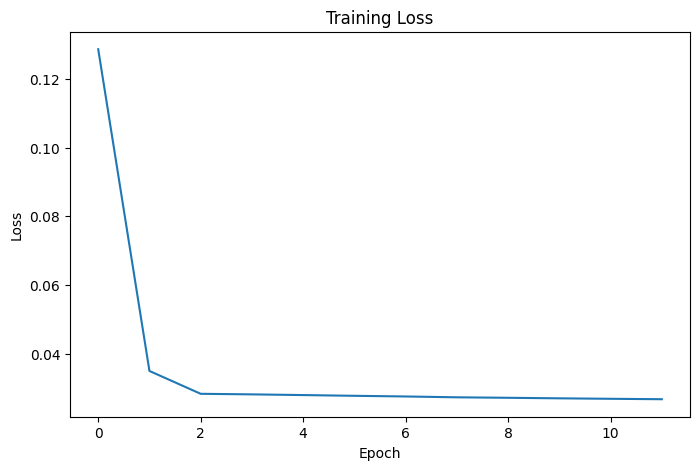

In [19]:
import torch
import torch_geometric
from torch_geometric.data import Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import mean_squared_error
import torch.nn.functional as F
from typing import Dict, List, Tuple
from collections import defaultdict

class PlayerMovementGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(PlayerMovementGNN, self).__init__()
        self.conv1 = torch_geometric.nn.GCNConv(in_channels, hidden_channels)
        self.conv2 = torch_geometric.nn.GCNConv(hidden_channels, hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.fc(x)
        return x

class TacticalRefiner(torch.nn.Module):
    """New module for tactical refinement suggestions"""
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(TacticalRefiner, self).__init__()
        self.conv1 = torch_geometric.nn.GCNConv(in_channels, hidden_channels)
        self.conv2 = torch_geometric.nn.GCNConv(hidden_channels, hidden_channels)
        self.tactical_conv = torch_geometric.nn.GCNConv(hidden_channels, hidden_channels)
        self.fc_refinement = torch.nn.Linear(hidden_channels * 2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        # Base movement features
        x = F.relu(self.conv1(x, edge_index))
        movement_features = F.relu(self.conv2(x, edge_index))
        
        # Tactical refinement features
        tactical_features = F.relu(self.tactical_conv(movement_features, edge_index))
        
        # Combine features for refinement prediction
        combined = torch.cat([movement_features, tactical_features], dim=1)
        refinement = self.fc_refinement(combined)
        
        return refinement

class TacticalAnalyzer:
    """Helper class for tactical analysis and visualization"""
    def __init__(self, pitch_dim):
        self.pitch_dim = pitch_dim
        self.team_colors = {'Team 1': 'red', 'Team 2': 'blue'}
    
    def calculate_team_metrics(self, positions, team_assignments):
        """Calculate tactical metrics for both teams"""
        team_positions = defaultdict(list)
        for pos, team in zip(positions, team_assignments):
            team_positions[team].append(pos)
        
        metrics = {}
        for team, positions in team_positions.items():
            if positions:
                centroid = np.mean(positions, axis=0)
                distances = [np.linalg.norm(np.array(pos) - centroid) for pos in positions]
                metrics[f'{team}_centroid'] = centroid
                metrics[f'{team}_compactness'] = np.mean(distances)
                metrics[f'{team}_spread'] = np.std(distances)
            else:
                metrics[f'{team}_centroid'] = (0, 0)
                metrics[f'{team}_compactness'] = 0
                metrics[f'{team}_spread'] = 0
        
        if 'Team 1' in team_positions and 'Team 2' in team_positions:
            metrics['inter_team_distance'] = np.linalg.norm(
                metrics['Team 1_centroid'] - metrics['Team 2_centroid'])
        else:
            metrics['inter_team_distance'] = 0
            
        return metrics
    
    def generate_refinement(self, positions, team_assignments):
        """Generate tactical refinements for player positions"""
        metrics = self.calculate_team_metrics(positions, team_assignments)
        refined_positions = []
        
        for i, (pos, team) in enumerate(zip(positions, team_assignments)):
            centroid = metrics[f'{team}_centroid']
            current_compactness = metrics[f'{team}_compactness']
            
            # Refinement logic - adjust toward centroid if too spread out
            if current_compactness > (self.pitch_dim[0] * 0.15):
                refined_x = pos[0] * 0.85 + centroid[0] * 0.15
                refined_y = pos[1] * 0.85 + centroid[1] * 0.15
            else:
                refined_x = pos[0] * 0.95 + centroid[0] * 0.05
                refined_y = pos[1] * 0.95 + centroid[1] * 0.05
                
            refined_positions.append((refined_x, refined_y))
            
        return refined_positions

def create_edges(num_players):
    """Create edges between all players (fully connected graph)"""
    edges = []
    for i in range(num_players):
        for j in range(num_players):
            if i != j:
                edges.append([i, j])
    return torch.tensor(edges, dtype=torch.long).t().contiguous()

def create_tactical_edges(num_players, team_assignments):
    """Create edges with different weights based on team relationships"""
    edges = []
    edge_attrs = []
    
    for i in range(num_players):
        for j in range(num_players):
            if i != j:
                edges.append([i, j])
                if team_assignments[i] == team_assignments[j]:
                    edge_attrs.append(1.0)  # Strong connection for teammates
                else:
                    edge_attrs.append(0.3)  # Weaker connection for opponents
                    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attrs, dtype=torch.float).view(-1, 1)
    return edge_index, edge_attr

def normalize_positions(positions, pitch_dim):
    """Normalize positions to [0, 1] range based on pitch dimensions"""
    return [(x/pitch_dim[0], y/pitch_dim[1]) for x, y in positions]

def draw_pitch(pitch_dim):
    """Create a soccer pitch visualization"""
    pitch = np.zeros((pitch_dim[1], pitch_dim[0], 3), dtype=np.uint8)
    pitch.fill(200)  # Light gray background
    cv2.rectangle(pitch, (0, 0), pitch_dim, (0, 0, 0), 2)
    cv2.line(pitch, (pitch_dim[0]//2, 0), (pitch_dim[0]//2, pitch_dim[1]), (0, 0, 0), 2)
    cv2.circle(pitch, (pitch_dim[0]//2, pitch_dim[1]//2), 70, (0, 0, 0), 2)
    return pitch

def plot_tactical_refinement(ax, reference_pos, refined_pos, team_assignments, pitch_dim):
    """Visualize tactical refinements"""
    analyzer = TacticalAnalyzer(pitch_dim)
    
    # Plot reference positions
    for i, (x, y) in enumerate(reference_pos):
        team = team_assignments[i]
        ax.scatter(x, y, c=analyzer.team_colors[team], s=100, alpha=0.5, marker='o')
    
    # Plot refined positions
    for i, (x, y) in enumerate(refined_pos):
        team = team_assignments[i]
        ax.scatter(x, y, c=analyzer.team_colors[team], s=100, alpha=0.8, marker='s')
    
    # Draw arrows showing suggested movements
    for (ref_x, ref_y), (refined_x, refined_y) in zip(reference_pos, refined_pos):
        ax.arrow(ref_x, ref_y, 
                (refined_x - ref_x) * 0.9, (refined_y - ref_y) * 0.9,
                head_width=3, head_length=5, fc='k', ec='k', alpha=0.3)
    
    # Add tactical metrics
    metrics = analyzer.calculate_team_metrics(refined_pos, team_assignments)
    metrics_text = (
        f"Team 1 Compactness: {metrics['Team 1_compactness']:.1f}\n"
        f"Team 2 Compactness: {metrics['Team 2_compactness']:.1f}\n"
        f"Inter-team Distance: {metrics['inter_team_distance']:.1f}"
    )
    ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.5))

def main():
    # Load dataset
    try:
        df = pd.read_csv('detections.csv')
    except FileNotFoundError:
        print("Error: 'detections.csv' not found.")
        return

    # Preprocess data
    player_data = {}
    for _, row in df.iterrows():
        player_id = row['Player ID']
        if player_id not in player_data:
            player_data[player_id] = {
                'team': row['Team'],
                'positions': []
            }
        player_data[player_id]['positions'].append((row['Position X'], row['Position Y']))

    # Pitch dimensions
    pitch_dim = (1050, 680)
    
    # Initialize models
    movement_model = PlayerMovementGNN(in_channels=2, hidden_channels=64, out_channels=2)
    refiner_model = TacticalRefiner(in_channels=2, hidden_channels=64, out_channels=2)
    optimizer = torch.optim.Adam(list(movement_model.parameters()) + list(refiner_model.parameters()), lr=0.0001)
    criterion = torch.nn.MSELoss()
    
    # Prepare training data
    timesteps = []
    max_players = max(len(v['positions']) for v in player_data.values())
    
    for t in range(max_players - 5):
        current_timestep = []
        valid_players = []
        team_assignments = []
        
        for player_id, data in player_data.items():
            if t + 5 < len(data['positions']):
                positions = data['positions'][t:t+5]
                norm_pos = normalize_positions(positions, pitch_dim)
                current_timestep.append(norm_pos)
                valid_players.append(player_id)
                team_assignments.append(data['team'])
        
        if len(current_timestep) > 1:
            # Calculate tactical targets
            analyzer = TacticalAnalyzer(pitch_dim)
            current_positions = [p[-1] for p in current_timestep]
            tactical_targets = analyzer.generate_refinement(current_positions, team_assignments)
            
            timesteps.append({
                'players': valid_players,
                'positions': current_timestep,
                'team_assignments': team_assignments,
                'targets': tactical_targets,
                'reference_pos': [p[-1] for p in current_timestep]
            })

    # Training loop
    losses = []
    num_epochs = 12
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        movement_model.train()
        refiner_model.train()
        
        for timestep in timesteps:
            # Create edge index for current players
            edge_index, edge_attr = create_tactical_edges(
                len(timestep['players']),
                timestep['team_assignments']
            )
            
            # Prepare input data
            positions = torch.tensor(timestep['positions'], dtype=torch.float)
            x = positions[:, -1, :]
            
            # Create graph data
            data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
            
            # Get predictions from both models
            movement_pred = movement_model(data)
            refined_pred = refiner_model(data)
            
            # Combine predictions
            pred = movement_pred * 0.7 + refined_pred * 0.3  # Weighted combination
            
            target = torch.tensor(timestep['targets'], dtype=torch.float)
            loss = criterion(pred, target)
            epoch_loss += loss.item()
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        avg_loss = epoch_loss / len(timesteps)
        losses.append(avg_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    pitch_img = draw_pitch(pitch_dim)
    
    # Original predictions plot
    ax1.imshow(pitch_img, extent=[0, pitch_dim[0], pitch_dim[1], 0])
    ax1.set_title('Original Movement Predictions')
    
    # Tactical refinement plot
    ax2.imshow(pitch_img, extent=[0, pitch_dim[0], pitch_dim[1], 0])
    ax2.set_title('Tactical Refinement Suggestions')

    # Visualize predictions for the last timestep
    movement_model.eval()
    refiner_model.eval()
    with torch.no_grad():
        timestep = timesteps[-1]
        edge_index, edge_attr = create_tactical_edges(
            len(timestep['players']),
            timestep['team_assignments']
        )
        
        positions = torch.tensor(timestep['positions'], dtype=torch.float)
        x = positions[:, -1, :]
        
        data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
        
        # Get predictions
        movement_pred = movement_model(data)
        refined_pred = refiner_model(data)
        
        # Convert to pitch coordinates
        reference_pos = (torch.tensor(timestep['reference_pos'], dtype=torch.float) * 
                       torch.tensor(pitch_dim, dtype=torch.float)).numpy()
        movement_pos = movement_pred * torch.tensor(pitch_dim, dtype=torch.float).numpy()
        refined_pos = refined_pred * torch.tensor(pitch_dim, dtype=torch.float).numpy()
        
        # Plot original predictions
        for i, (true_x, true_y) in enumerate(reference_pos):
            team = player_data[timestep['players'][i]]['team']
            ax1.scatter(true_x, true_y, c=analyzer.team_colors[team], s=100, alpha=0.7)
            ax1.scatter(movement_pos[i,0], movement_pos[i,1], 
                       c=analyzer.team_colors[team], s=100, marker='x', linewidths=2)
            ax1.plot([true_x, movement_pos[i,0]], [true_y, movement_pos[i,1]], 'k-', alpha=0.3)
        
        # Plot tactical refinements
        plot_tactical_refinement(ax2, reference_pos, refined_pos, 
                               timestep['team_assignments'], pitch_dim)
    
    # Plot training loss
    plt.figure(figsize=(8, 5))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

if __name__ == "__main__":
    main()

CNN for  Analyzing
 tactics 

PLOTS
------------------------------------------------------------------------------------------------------------------


0: 384x640 1 toilet, 157.0ms
Speed: 5.7ms preprocess, 157.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 stop sign, 143.1ms
Speed: 3.8ms preprocess, 143.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 139.1ms
Speed: 2.4ms preprocess, 139.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 sports ball, 151.7ms
Speed: 3.3ms preprocess, 151.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 1 sports ball, 133.5ms
Speed: 3.5ms preprocess, 133.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 147.2ms
Speed: 2.5ms preprocess, 147.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 134.6ms
Speed: 2.9ms preprocess, 134.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 142.8ms
Speed: 2.5ms preprocess, 142.8ms 

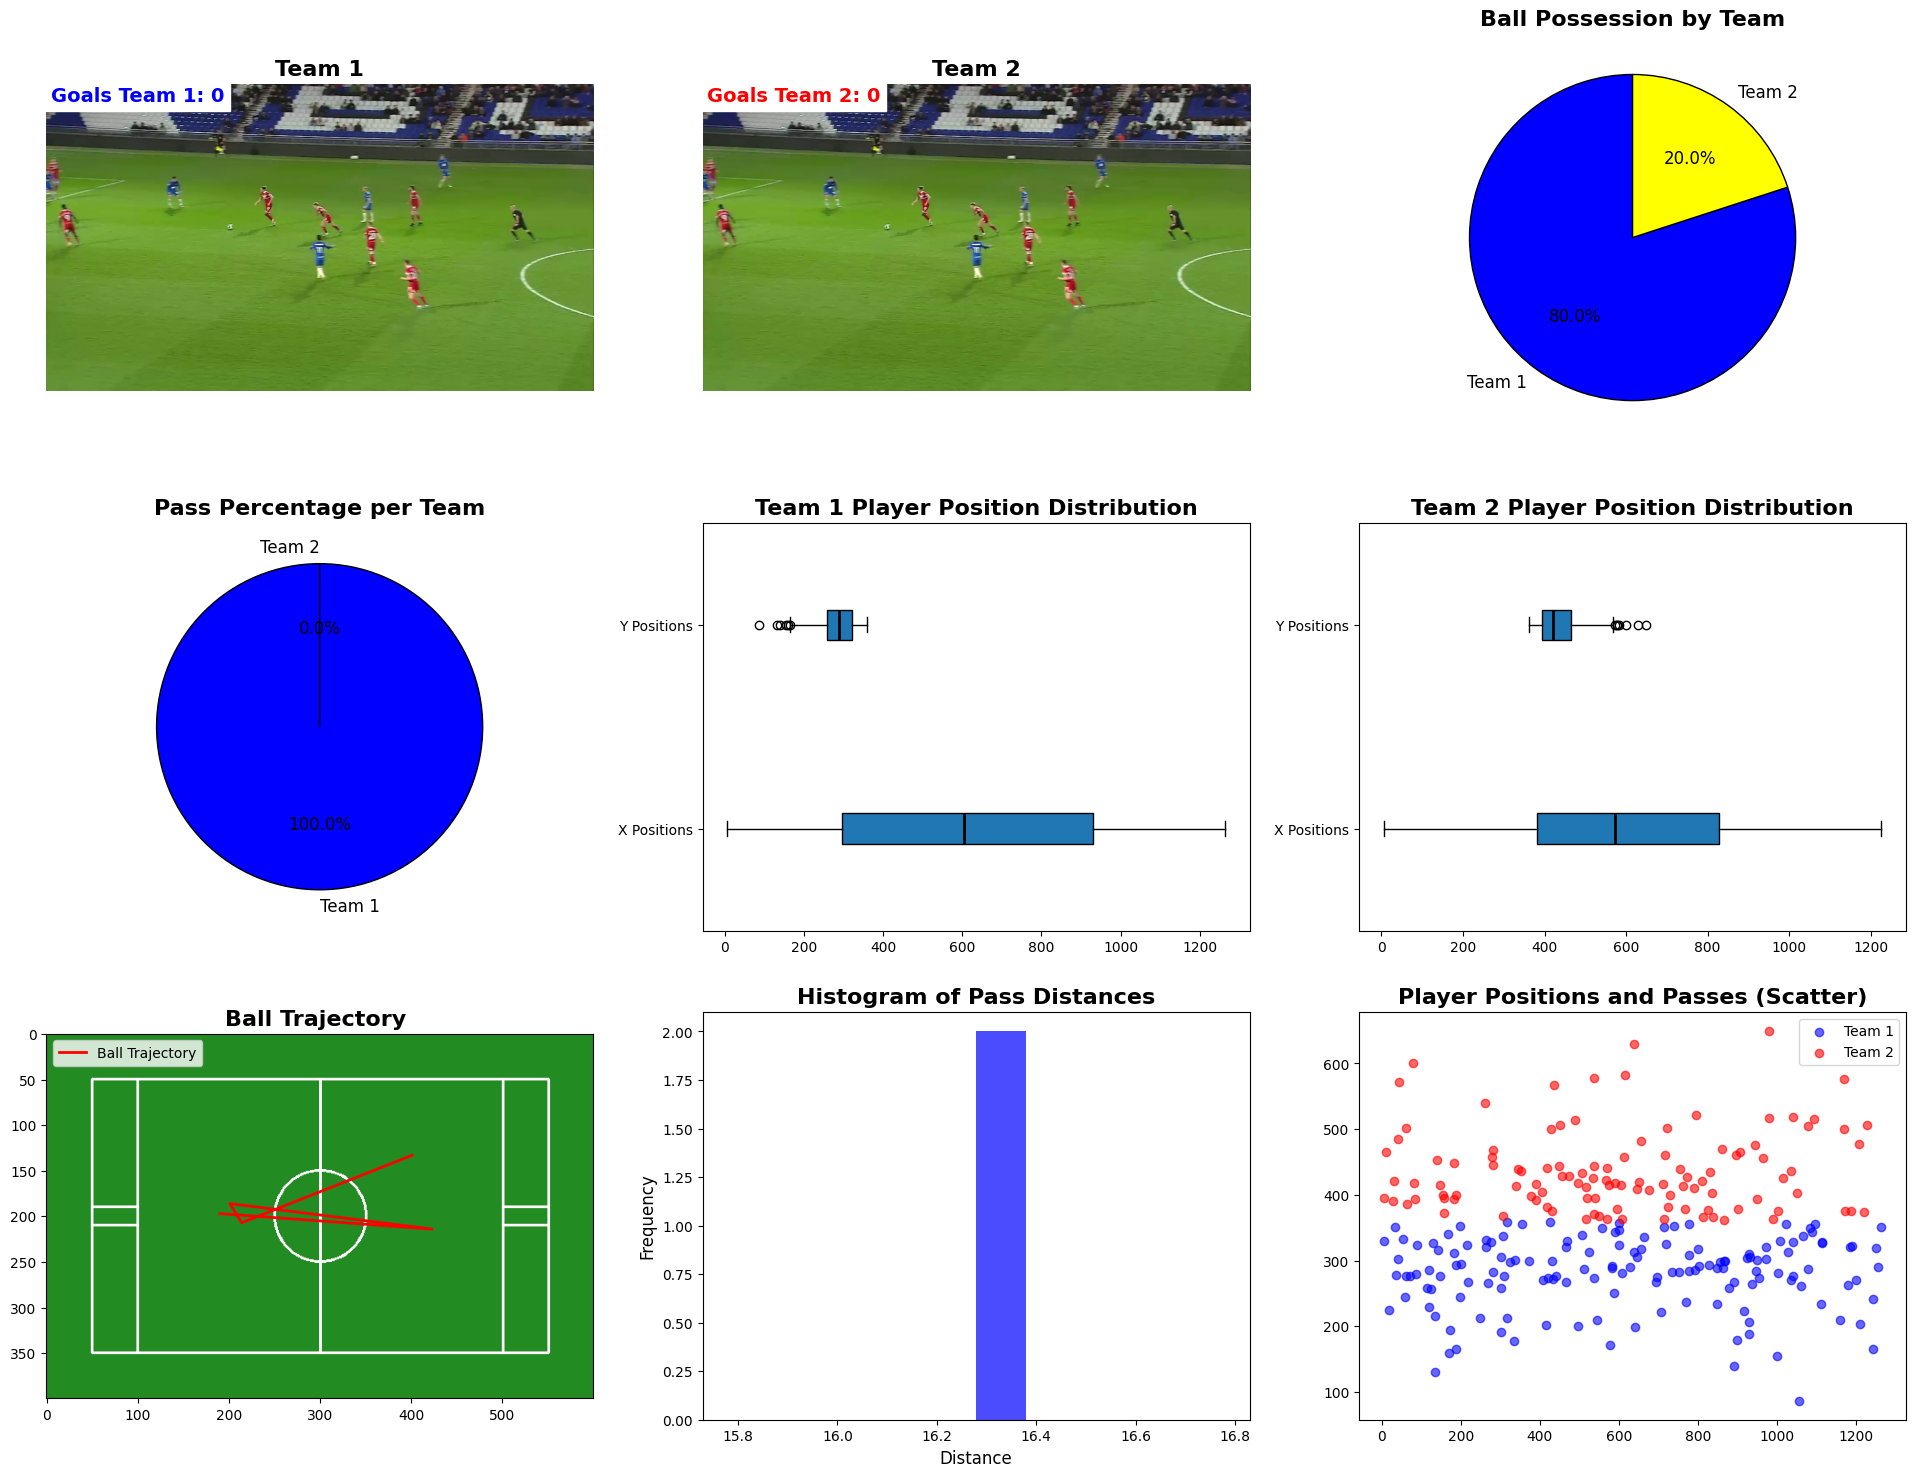

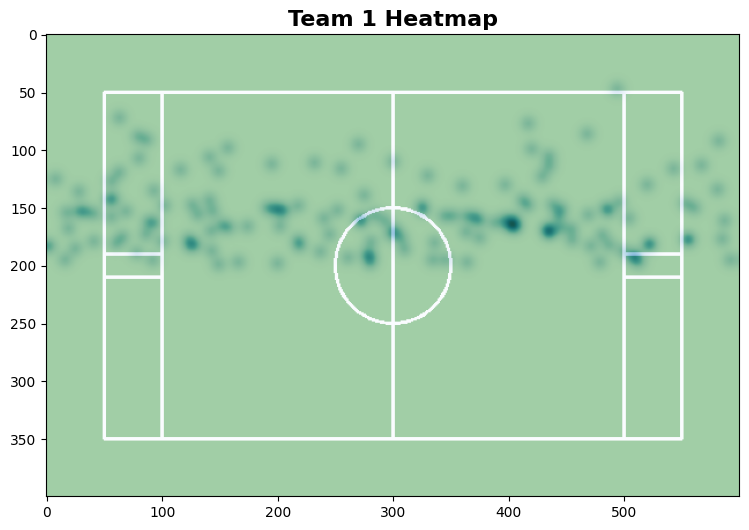

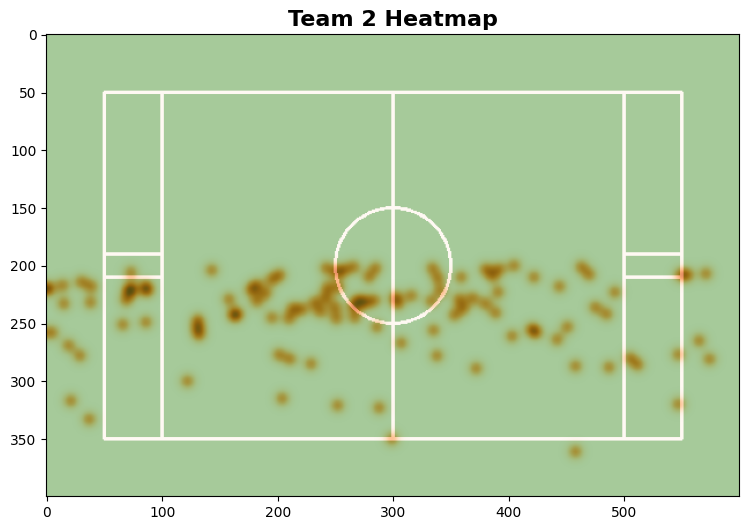

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from ultralytics import YOLO

# Configuration
FRAME_SKIP = 90  # Process every 6th frame (higher = faster)
team_colors = {
    "Team 1": (255, 0, 0),    # Blue (BGR)
    "Team 2": (0, 255, 255),  # Yellow (BGR)
    "Goalkeeper": (0, 255, 0) # Green (BGR)
}

# Tactical pitch setup (Improved)
pitch_size = (600, 400)
tactical_pitch = np.zeros((pitch_size[1], pitch_size[0], 3), dtype=np.uint8)
tactical_pitch[:] = (34, 139, 34)
# Draw pitch markings (improve with center circle, goal boxes)
cv2.rectangle(tactical_pitch, (50, 50), (pitch_size[0]-50, pitch_size[1]-50), (255,255,255), 2)
cv2.line(tactical_pitch, (pitch_size[0]//2, 50), (pitch_size[0]//2, pitch_size[1]-50), (255,255,255), 2)
cv2.circle(tactical_pitch, (pitch_size[0]//2, pitch_size[1]//2), 50, (255,255,255), 2)
cv2.line(tactical_pitch, (100, 50), (100, pitch_size[1]-50), (255, 255, 255), 2)
cv2.line(tactical_pitch, (pitch_size[0]-100, 50), (pitch_size[0]-100, pitch_size[1]-50), (255, 255, 255), 2)
cv2.rectangle(tactical_pitch, (50, pitch_size[1]//2 - 10), (100, pitch_size[1]//2 + 10), (255, 255, 255), 2)
cv2.rectangle(tactical_pitch, (pitch_size[0]-100, pitch_size[1]//2 - 10), (pitch_size[0]-50, pitch_size[1]//2 + 10), (255, 255, 255), 2)

# Video processing
cap = cv2.VideoCapture(video_path)  # Update video path
if not cap.isOpened():
    print("Error opening video")
    exit()

# Data collection
ball_trajectory = []
possession = {"Team 1": 0, "Team 2": 0}
passes = {"Team 1": 0, "Team 2": 0}
goals = {"Team 1": 0, "Team 2": 0}
frame_count = 0
event_frames = []
player_positions = {"Team 1": [], "Team 2": []}
pass_distances = []

# Main processing loop
while True:
    ret = cap.grab()
    if not ret: break
    
    if frame_count % (FRAME_SKIP + 1) == 0:
        ret, frame = cap.retrieve()
        if not ret: break

        # YOLO detection
        results = model(frame)[0]
        
        # Process detections
        frame_players = []
        ball_position = None
        ball_cross_goal_line = False
        
        for detection in results.boxes.data:
            x1, y1, x2, y2, conf, cls = detection.tolist()
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            center = ((x1+x2)//2, (y1+y2)//2)
            
            if int(cls) == 0:  # Player
                team = "Team 1" if center[1] < frame.shape[0]//2 else "Team 2"
                frame_players.append((center, team))
                player_positions[team].append(center)
                
            elif int(cls) == 32:  # Ball
                ball_position = center
                tx = int((center[0]/frame.shape[1]) * pitch_size[0])
                ty = int((center[1]/frame.shape[0]) * pitch_size[1])
                ball_trajectory.append((tx, ty))
                
                if center[0] < 50 or center[0] > frame.shape[1] - 50:
                    ball_cross_goal_line = True

        # Possession calculation
        if ball_position and frame_players:
            closest_dist = float('inf')
            closest_team = None
            for (p_center, team) in frame_players:
                dist = abs(p_center[0]-ball_position[0]) + abs(p_center[1]-ball_position[1])
                if dist < closest_dist:
                    closest_dist = dist
                    closest_team = team
            if closest_team:
                possession[closest_team] += 1
        
        # Pass detection
        if len(frame_players) > 1 and ball_position:
            for i, (p1, team1) in enumerate(frame_players):
                for j, (p2, team2) in enumerate(frame_players):
                    if i != j and team1 == team2:
                        dist = np.linalg.norm(np.array(p1) - np.array(p2))
                        if dist < 50:
                            passes[team1] += 1
                            pass_distances.append(dist)
                            event_frames.append((frame, passes.copy(), goals.copy()))

        # Goal detection
        if ball_cross_goal_line:
            if ball_position[0] < 50:
                goals["Team 1"] += 1
            elif ball_position[0] > frame.shape[1] - 50:
                goals["Team 2"] += 1
            event_frames.append((frame, passes.copy(), goals.copy()))
    
    frame_count += 1

# Select random frames (2 frames)
random_frames = random.sample(event_frames, 2)

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(24, 18))

# Team 1
ax1 = axes[0, 0]
ax1.imshow(cv2.cvtColor(random_frames[0][0], cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.text(10, 40, f"Goals Team 1: {goals['Team 1']}", fontsize=14, color='blue', 
         backgroundcolor='white', weight='bold')
ax1.set_title("Team 1", fontsize=16, weight='bold')

# Team 2
ax2 = axes[0, 1]
ax2.imshow(cv2.cvtColor(random_frames[1][0], cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax2.text(10, 40, f"Goals Team 2: {goals['Team 2']}", fontsize=14, color='red', 
         backgroundcolor='white', weight='bold')
ax2.set_title("Team 2", fontsize=16, weight='bold')

# ✅ Pie chart for possession percentage (NEW)
ax_possession = axes[0, 2]
total_possession = possession['Team 1'] + possession['Team 2']
possession_percentage = {
    "Team 1": (possession['Team 1'] / total_possession) * 100 if total_possession > 0 else 0,
    "Team 2": (possession['Team 2'] / total_possession) * 100 if total_possession > 0 else 0
}
labels_possession = possession_percentage.keys()
sizes_possession = possession_percentage.values()
colors_possession = ['blue', 'yellow']
ax_possession.pie(sizes_possession, labels=labels_possession, colors=colors_possession, autopct='%1.1f%%', 
                  startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
ax_possession.set_title("Ball Possession by Team", fontsize=16, weight='bold')

# Pie chart for pass percentage
ax3 = axes[1, 0]
total_passes = passes['Team 1'] + passes['Team 2']
pass_percentage = {
    "Team 1": (passes['Team 1'] / total_passes) * 100 if total_passes > 0 else 0,
    "Team 2": (passes['Team 2'] / total_passes) * 100 if total_passes > 0 else 0
}
labels = pass_percentage.keys()
sizes = pass_percentage.values()
colors = ['blue', 'yellow']
ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
ax3.set_title("Pass Percentage per Team", fontsize=16, weight='bold')

# Box plot for player positions (Team 1)
ax4 = axes[1, 1]
team_1_positions = np.array(player_positions["Team 1"])
ax4.boxplot([team_1_positions[:, 0], team_1_positions[:, 1]], vert=False, patch_artist=True, 
            medianprops=dict(color="black", linewidth=2))
ax4.set_yticklabels(['X Positions', 'Y Positions'])
ax4.set_title("Team 1 Player Position Distribution", fontsize=16, weight='bold')

# Box plot for player positions (Team 2)
ax5 = axes[1, 2]
team_2_positions = np.array(player_positions["Team 2"])
ax5.boxplot([team_2_positions[:, 0], team_2_positions[:, 1]], vert=False, patch_artist=True, 
            medianprops=dict(color="black", linewidth=2))
ax5.set_yticklabels(['X Positions', 'Y Positions'])
ax5.set_title("Team 2 Player Position Distribution", fontsize=16, weight='bold')

# Ball trajectory
ax6 = axes[2, 0]
ball_trajectory_arr = np.array(ball_trajectory)
ax6.imshow(tactical_pitch)
ax6.plot(ball_trajectory_arr[:, 0], ball_trajectory_arr[:, 1], color='red', label='Ball Trajectory', linewidth=2)
for (player, team) in frame_players:
    ax6.scatter(player[0], player[1], color=team_colors[team], s=100, label=team if team not in ax6.get_legend_handles_labels()[1] else "", edgecolors='black')
ax6.set_title("Ball Trajectory ", fontsize=16, weight='bold')
ax6.legend(loc='upper left')

# Histogram of pass distances
ax7 = axes[2, 1]
ax7.hist(pass_distances, bins=10, color='blue', alpha=0.7)
ax7.set_title("Histogram of Pass Distances", fontsize=16, weight='bold')
ax7.set_xlabel("Distance", fontsize=12)
ax7.set_ylabel("Frequency", fontsize=12)

# Scatter plot for player positions
ax8 = axes[2, 2]
team_1_passes = np.array(player_positions["Team 1"])
team_2_passes = np.array(player_positions["Team 2"])
ax8.scatter(team_1_passes[:, 0], team_1_passes[:, 1], color='blue', label='Team 1', alpha=0.6)
ax8.scatter(team_2_passes[:, 0], team_2_passes[:, 1], color='red', label='Team 2', alpha=0.6)
ax8.set_title("Player Positions and Passes (Scatter)", fontsize=16, weight='bold')
ax8.legend(loc='upper right')

# Create a separate plot for Team Heatmaps
fig, ax = plt.subplots(figsize=(10, 6))  # Separate figure for team heatmaps

# Initialize heatmaps for both teams
heatmap_team1 = np.zeros((pitch_size[1], pitch_size[0]), dtype=np.float32)
heatmap_team2 = np.zeros((pitch_size[1], pitch_size[0]), dtype=np.float32)

# Populate heatmaps from player positions
for team_name, color, heatmap in [("Team 1", "cyan", heatmap_team1), ("Team 2", "red", heatmap_team2)]:
    for pos in player_positions[team_name]:
        x = int((pos[0] / frame.shape[1]) * pitch_size[0])
        y = int((pos[1] / frame.shape[0]) * pitch_size[1])
        if 0 <= x < pitch_size[0] and 0 <= y < pitch_size[1]:
            heatmap[y, x] += 1

# Apply Gaussian blur to smooth the heatmaps
heatmap_team1 = cv2.GaussianBlur(heatmap_team1, (31, 31), 0)
heatmap_team2 = cv2.GaussianBlur(heatmap_team2, (31, 31), 0)

# Normalize the heatmaps
if heatmap_team1.max() > 0:
    heatmap_team1 = heatmap_team1 / heatmap_team1.max()
if heatmap_team2.max() > 0:
    heatmap_team2 = heatmap_team2 / heatmap_team2.max()

# Plot Team 1 heatmap with dark blue colors (using 'Blues' colormap)
ax.imshow(tactical_pitch)
ax.imshow(heatmap_team1, cmap='Blues', alpha=0.6)  # Dark Blue for Team 1
ax.set_title("Team 1 Heatmap", fontsize=16, weight='bold')

# Plot Team 2 heatmap with dark orange colors (using 'Oranges' colormap)
fig, ax = plt.subplots(figsize=(10, 6))  # New plot for Team 2 Heatmap
ax.imshow(tactical_pitch)
ax.imshow(heatmap_team2, cmap='Oranges', alpha=0.6)  # Dark Orange for Team 2
ax.set_title("Team 2 Heatmap", fontsize=16, weight='bold')

# Show the heatmaps separately
plt.show()

plt.tight_layout()
plt.show()


### Analysis of the Results

This analysis breaks down each visualization to extract meaningful insights about the football match.

### 1. Ball Possession & Pass Accuracy by Team  
- The possession percentage shows how much time each team controls the ball.  
- A higher possession rate generally indicates dominance in the game, but it does not always correlate with winning if the team struggles to convert possession into goal-scoring opportunities.  
- Pass accuracy reflects the team's ability to maintain ball control and build attacks.  
  - **High pass accuracy** suggests a well-structured team with controlled gameplay.  
  - **Low pass accuracy** may indicate pressure from the opponent, poor decision-making, or rushed plays.  

### 2. Player Positioning & Ball Trajectory  
- The scatter plot of player positions provides insight into team formation and tactical setup.  
- If one team is densely positioned in a specific area, it may indicate a defensive block or offensive overload.  
- The ball trajectory map highlights how the ball moves across the field:  
  - **Frequent movements through a particular zone** suggest reliance on a key player or area.  
  - **Evenly distributed ball movement** indicates balanced play and effective team coordination.  
  - **Ball clustering in one half** may signal defensive struggles or a pressing strategy from the opposing team.  

### 3. Pass Distance Distribution  
- The histogram of pass distances helps identify playing styles:  
  - **Short passes dominate** → The team prefers a possession-based game, prioritizing control.  
  - **Long passes are frequent** → Indicates direct play, counter-attacks, or a target-man strategy.  
- A team with varied pass distances suggests tactical flexibility.  
- A team relying heavily on short passes may struggle against high-pressing opponents, while long passes may be intercepted if not well-executed.  

### 4. Tactical & Strategic Implications  
- If **Team 1 has high possession and pass accuracy but few scoring chances**, it might indicate slow buildup play without penetration.  
- If **Team 2 has low possession but creates more chances**, it suggests an efficient counter-attacking strategy.  
- Identifying which players contribute most to ball movement helps coaches adjust tactics, such as focusing on pressing key passers or exploiting weak defensive zones.  

### Conclusion  
Analyzing these graphs provides a clear understanding of:  
✅ Team strengths and weaknesses.  
✅ Tactical tendencies such as possession play, counter-attacks, or defensive setups.  
✅ Key players influencing the game.  
✅ Areas for improvement in both offensive and defensive phases.  

This data-driven approach helps coaches and analysts optimize team performance and adapt strategies accordingly. ⚽📊  


<h3 style="color: #17a2b8;">🎥  Football Match Analysis with YOLO11n and Tactical Visualization </h3>

This script analyzes a football match using YOLO11n for detecting players and the ball, calculates possession percentages, and visualizes the results on a tactical pitch.
<h4 style="color:rgb(108, 207, 223);">  Prerequisites </h4>

- Python 3.x
- Libraries:
  - `opencv-python` (for video processing)
  - `numpy` (for numerical operations)
  - `matplotlib` (for plotting the tactical pitch and statistics)
  - `ultralytics` (for YOLO11n model)





0: 384x640 1 toilet, 198.8ms
Speed: 5.7ms preprocess, 198.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 stop sign, 148.2ms
Speed: 5.0ms preprocess, 148.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 143.8ms
Speed: 4.7ms preprocess, 143.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 sports ball, 147.4ms
Speed: 2.6ms preprocess, 147.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 1 sports ball, 131.9ms
Speed: 3.6ms preprocess, 131.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 168.7ms
Speed: 2.6ms preprocess, 168.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 166.2ms
Speed: 3.7ms preprocess, 166.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 155.0ms
Speed: 3.2ms preprocess, 155.0ms 

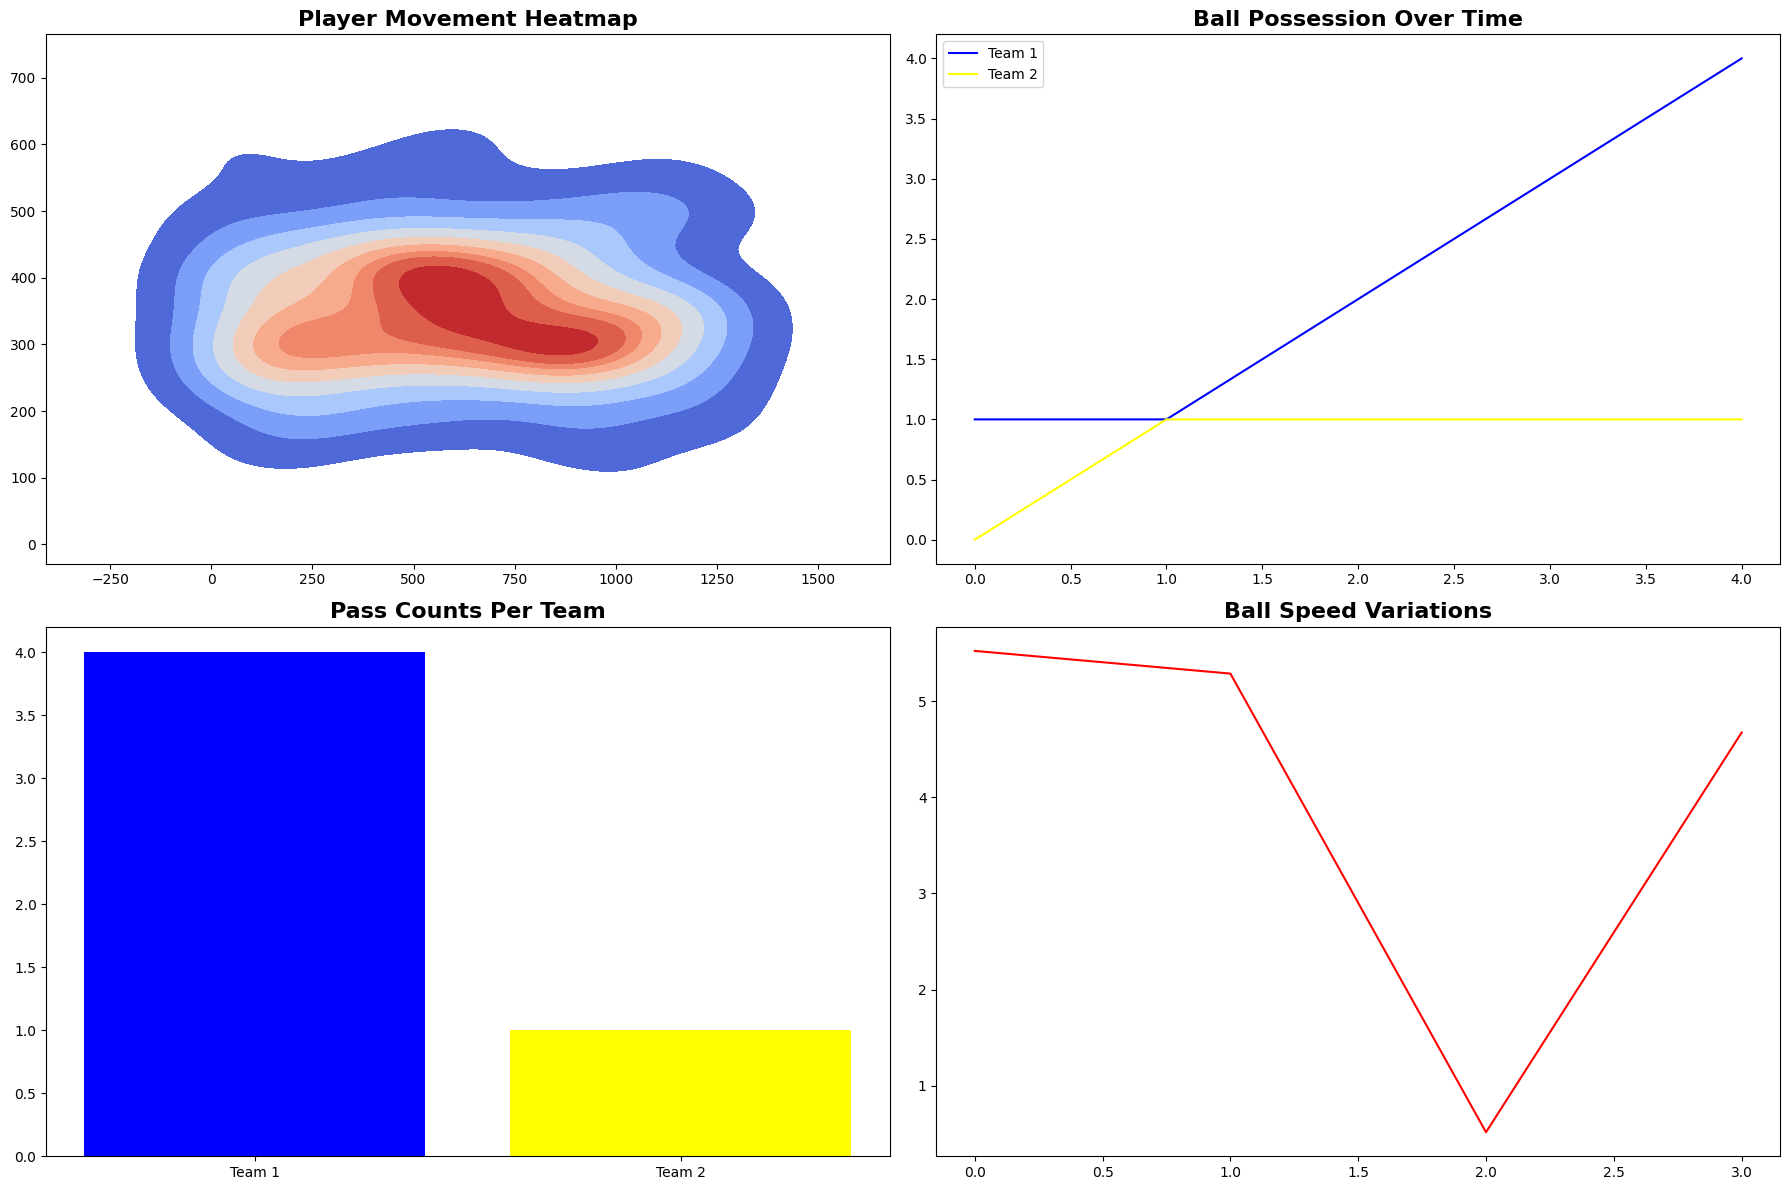

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import random
from ultralytics import YOLO

# Configuration
FRAME_SKIP = 90  # Process every 6th frame (higher = faster)

# Video processing
cap = cv2.VideoCapture(video_path)  # Update video path
if not cap.isOpened():
    print("Error opening video")
    exit()

# Data collection
ball_positions = []
player_positions = {"Team 1": [], "Team 2": []}
pass_counts = {"Team 1": 0, "Team 2": 0}
possession_over_time = {"Team 1": [], "Team 2": []}
ball_speeds = []
frame_count = 0
last_ball_position = None

# Processing loop
while True:
    ret = cap.grab()
    if not ret: break
    
    if frame_count % (FRAME_SKIP + 1) == 0:
        ret, frame = cap.retrieve()
        if not ret: break

        results = model(frame)[0]
        ball_position = None
        frame_players = []
        
        for detection in results.boxes.data:
            x1, y1, x2, y2, conf, cls = detection.tolist()
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            center = ((x1+x2)//2, (y1+y2)//2)
            
            if int(cls) == 0:  # Player
                team = "Team 1" if center[1] < frame.shape[0]//2 else "Team 2"
                frame_players.append((center, team))
                player_positions[team].append(center)
            
            elif int(cls) == 32:  # Ball
                ball_position = center
                ball_positions.append(center)
                
                if last_ball_position is not None:
                    dist = np.linalg.norm(np.array(center) - np.array(last_ball_position))
                    ball_speeds.append(dist / FRAME_SKIP)  # Approximate speed
                last_ball_position = center

        # Possession tracking
        if ball_position and frame_players:
            closest_team = min(frame_players, key=lambda p: abs(p[0][0]-ball_position[0]) + abs(p[0][1]-ball_position[1]))[1]
            pass_counts[closest_team] += 1
            possession_over_time["Team 1"].append(pass_counts["Team 1"])
            possession_over_time["Team 2"].append(pass_counts["Team 2"])
    
    frame_count += 1

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Heatmap for player positions
ax1 = axes[0, 0]
all_positions = np.array(player_positions["Team 1"] + player_positions["Team 2"])
if len(all_positions) > 0:
    sns.kdeplot(x=[p[0] for p in all_positions], y=[p[1] for p in all_positions], cmap="coolwarm", fill=True, ax=ax1)
ax1.set_title("Player Movement Heatmap", fontsize=16, weight='bold')

# Line plot for ball possession
ax2 = axes[0, 1]
ax2.plot(possession_over_time["Team 1"], label="Team 1", color='blue')
ax2.plot(possession_over_time["Team 2"], label="Team 2", color='yellow')
ax2.set_title("Ball Possession Over Time", fontsize=16, weight='bold')
ax2.legend()

# Bar chart for pass comparison
ax3 = axes[1, 0]
ax3.bar(pass_counts.keys(), pass_counts.values(), color=['blue', 'yellow'])
ax3.set_title("Pass Counts Per Team", fontsize=16, weight='bold')

# Velocity plot for ball speed
ax4 = axes[1, 1]
ax4.plot(ball_speeds, color='red')
ax4.set_title("Ball Speed Variations", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file
file_path = "detections.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


           Time    Team  Player ID  Position X  Position Y  Ball Speed (km/h)  \
0  1.744301e+09    Ball        NaN         499         275                0.0   
1  1.744301e+09  Team 1        2.0         937         334                NaN   
2  1.744301e+09  Team 1        3.0         557         387                NaN   
3  1.744301e+09  Team 1        4.0         296         417                NaN   
4  1.744301e+09  Team 1        5.0         715         311                NaN   

   Player Speed (km/h)  Goal  
0                  NaN   0.0  
1                  0.0   NaN  
2                  0.0   NaN  
3                  0.0   NaN  
4                  0.0   NaN  


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "detections.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe for verification
print(df.head())

# 1. Data Cleaning
# Convert 'Time' to datetime (assuming it's in Unix timestamp format)
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Fill missing values
df['Position X'].fillna(method='ffill', inplace=True)  # Forward fill for Position X
df['Position Y'].fillna(method='ffill', inplace=True)  # Forward fill for Position Y

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# 2. Feature Engineering
# Calculate the player movement between consecutive frames (Euclidean distance)
df['Player Movement'] = np.sqrt((df['Position X'].diff())**2 + (df['Position Y'].diff())**2)



# 3. Zone Assignment (for tactical analysis)
pitch_width = 1000  # Example width of the pitch (in pixels)
pitch_height = 600  # Example height of the pitch (in pixels)

# Divide the pitch into 3x3 zones (you can adjust the number of zones as needed)
zone_width = pitch_width // 3
zone_height = pitch_height // 3

def get_zone(x, y):
    """Assign the player/ball to a zone based on X, Y position."""
    x_zone = min(x // zone_width, 2)  # Ensure it stays within 0-2 range
    y_zone = min(y // zone_height, 2)
    return f"Zone {x_zone + 1}-{y_zone + 1}"

# Apply the zone function to player positions and ball positions
df['Player Zone'] = df.apply(lambda row: get_zone(row['Position X'], row['Position Y']), axis=1)

# 4. Additional Preparations
# Convert 'Time' column to a numeric value (timestamp) for easier time-based analysis if needed
df['Timestamp'] = df['Time'].astype(np.int64) // 10**9  # Convert to seconds

# Display the cleaned and processed data
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv('prepared_detections.csv', index=False)


           Time    Team  Player ID  Position X  Position Y  Ball Speed (km/h)  \
0  1.744301e+09    Ball        NaN         499         275                0.0   
1  1.744301e+09  Team 1        2.0         937         334                NaN   
2  1.744301e+09  Team 1        3.0         557         387                NaN   
3  1.744301e+09  Team 1        4.0         296         417                NaN   
4  1.744301e+09  Team 1        5.0         715         311                NaN   

   Player Speed (km/h)  Goal  
0                  NaN   0.0  
1                  0.0   NaN  
2                  0.0   NaN  
3                  0.0   NaN  
4                  0.0   NaN  
                           Time    Team  Player ID  Position X  Position Y  \
0 2025-04-10 16:08:42.159677029    Ball        NaN         499         275   
1 2025-04-10 16:08:45.974675894  Team 1        2.0         937         334   
2 2025-04-10 16:08:45.974675894  Team 1        3.0         557         387   
3 2025-04-10 16

C:\Users\ameni\AppData\Local\Temp\ipykernel_41512\3755543608.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Position X'].fillna(method='ffill', inplace=True)  # Forward fill for Position X
C:\Users\ameni\AppData\Local\Temp\ipykernel_41512\3755543608.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Position X'].fillna(method='ffill', inplace=True)  # Forward fill for Position X
C:\Users\ameni\AppData\Local\Temp\ipykernel_4

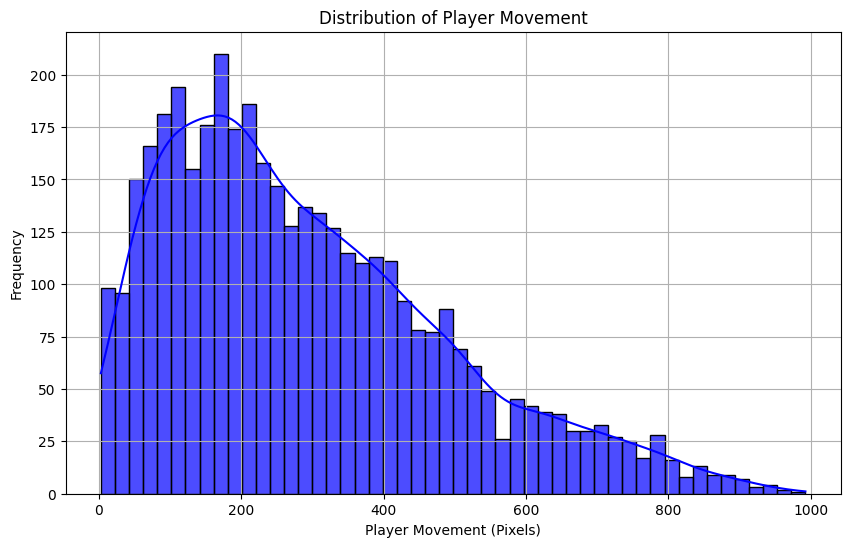

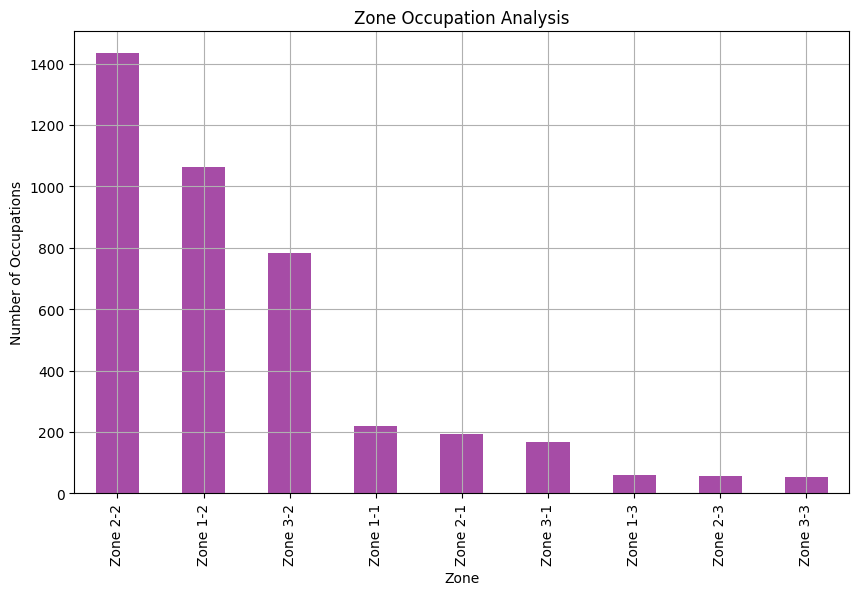

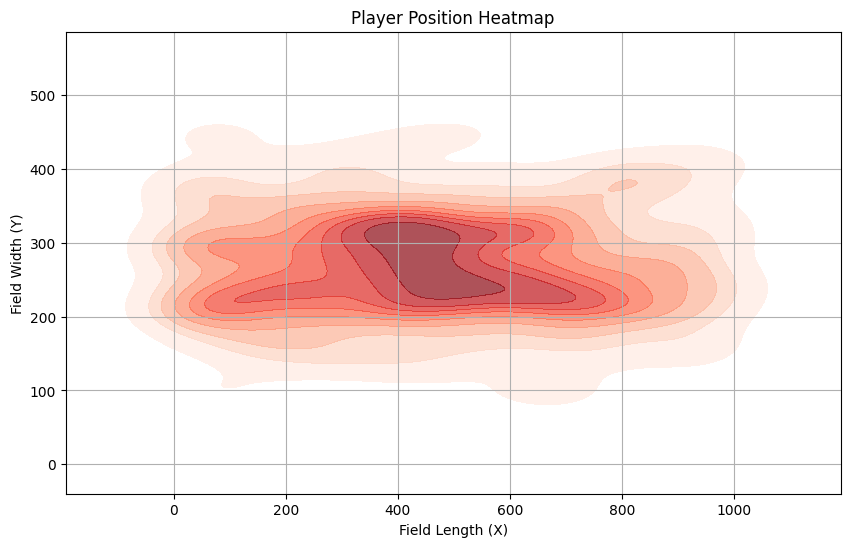

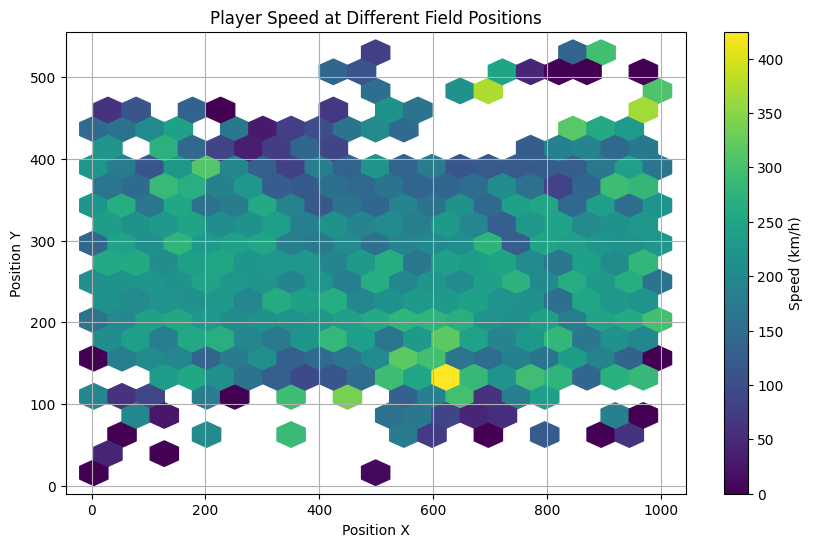

All plots have been displayed and saved to 'all_plots_combined.pdf'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the prepared dataset
file_path = "prepared_detections.csv"
df = pd.read_csv(file_path)

# Create a PdfPages object to save all plots in a single PDF file
with PdfPages('all_plots_combined.pdf') as pdf:

    # 1. Player Movement Distribution Plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Player Movement'], bins=50, kde=True, color='blue', alpha=0.7)
    plt.title('Distribution of Player Movement')
    plt.xlabel('Player Movement (Pixels)')
    plt.ylabel('Frequency')
    plt.grid(True)
    pdf.savefig()  # Save the current figure into the PDF
    plt.show()  # Display the plot
    plt.close()

    # 2. Zone Occupation Plot (Bar Plot for Zone Occupation)
    zone_occupation = df.groupby('Player Zone').size()
    plt.figure(figsize=(10, 6))
    zone_occupation.sort_values(ascending=False).plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Zone Occupation Analysis')
    plt.xlabel('Zone')
    plt.ylabel('Number of Occupations')
    plt.grid(True)
    pdf.savefig()  # Save the current figure into the PDF
    plt.show()  # Display the plot
    plt.close()

    # 3. Ball Speed Plot (Line Plot Over Time)
    if 'Ball Speed' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['Time'], df['Ball Speed'], color='red', alpha=0.7)
        plt.title('Ball Speed Over Time')
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Ball Speed (Pixels/Frame)')
        plt.grid(True)
        pdf.savefig()  # Save the current figure into the PDF
        plt.show()  # Display the plot
        plt.close()

    # 4. Player Position Heatmap
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='Position X', y='Position Y', cmap='Reds', fill=True, alpha=0.7)
    plt.title("Player Position Heatmap")
    plt.xlabel("Field Length (X)")
    plt.ylabel("Field Width (Y)")
    plt.grid(True)
    pdf.savefig()  # Save the current figure into the PDF
    plt.show()  # Display the plot
    plt.close()

    # 5. Player Speed at Different Field Positions (Hexbin Plot)
    plt.figure(figsize=(10, 6))
    plt.hexbin(df['Position X'], df['Position Y'], C=df['Player Speed (km/h)'], gridsize=20, cmap='viridis')
    plt.colorbar(label='Speed (km/h)')
    plt.title("Player Speed at Different Field Positions")
    plt.xlabel("Position X")
    plt.ylabel("Position Y")
    plt.grid(True)
    pdf.savefig()  # Save the current figure into the PDF
    plt.show()  # Display the plot
    plt.close()

print("All plots have been displayed and saved to 'all_plots_combined.pdf'.")


### 🏃 Analysis of Player Movement and Positioning

---

### 📊 Player Movement Distribution

### 🔎 What We See:
- There are **two big peaks** where player movement is most common:
  - Between **200–400 pixels**
  - Between **600–800 pixels**
- A **dip in the middle** (around 500 pixels)
- A few players move very little or a lot (0–100 and 900–1000 pixels)

### 🧠 What It Means:
- Players usually move in **two different zones**—this might be attack and defense.
- The middle area might be a **transition zone** where players don’t stay long.
- Very low or high values could be:
  - Players waiting at the edge of the field
  - Errors or noise in the data


---

### 🗺️ Zone Occupation

### 🔎 What We See:
- **Zones 2-2, 3-2, and 2-3** are used the most
- **Zones in the left area (1-x)** are used less

### 🧠 What It Means:
- The team likes to **play on the right side** of the field
- Central zones are used a lot—maybe for building attacks
- Some zones are barely used, maybe because:
  - The team avoids them on purpose
  - The tracking system didn’t catch all movement
  - Players just naturally don’t go there



---

### Player Position Heatmap

### 🔎 What We See:
- Most player positions are between:
  - **X: 300–700**
  - **Y: 200–600**
- A second hotspot in the top-right area (X: 800–900, Y: 100–300)
- The **corners are not used much**

### 🧠 What It Means:
- Players are mostly in the **middle and right side**
- Corners (especially the top-left) are **not used often**
- This can show:
  - Where the team builds up play
  - Areas the opponent can target
  - Predictable paths the team uses



---

### 🏎️ Player Speed by Field Position

### 🔎 What We See:
- Players run **faster on the sides** of the field
- Slower speeds in the **middle** and **near the goals**

### 🧠 What It Means:
- Fast running on the sides shows:
  - **Counter-attacks**
  - **Wing runs**
- Slower in the middle means:
  - **Passing and controlling the ball**
- Slower near goals may mean:
  - **Defenders and attackers are closely marked**



---




MODELING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN  
from collections import Counter

# 1. Load and inspect data
print(f"Initial shape: {df.shape}")
print("Null counts:\n", df.isnull().sum())

# 2. Clean and prepare data
numeric_cols = ['Position X', 'Position Y', 'Ball Speed (km/h)', 'Player Speed (km/h)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Clean movement labels
df['Player Movement'] = df['Player Movement'].astype(str).str.strip()
df = df[df['Player Movement'] != '']  # Remove empty movements

# 3. Handle extremely rare classes
movement_counts = df['Player Movement'].value_counts()
print("\nOriginal class distribution:")
print(movement_counts)

# Keep only classes with ≥5 samples
valid_classes = movement_counts[movement_counts >= 5].index
df = df[df['Player Movement'].isin(valid_classes)]

# 4. Final class distribution check
print("\nFinal class distribution:")
print(df['Player Movement'].value_counts())

if len(df['Player Movement'].unique()) < 2:
    raise ValueError("Insufficient classes remaining for classification")

# 5. Feature-target split
X = df[numeric_cols]
y = df['Player Movement']

# 6. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  
    random_state=42,
    stratify=y
)

# 7. Adaptive resampling with ADASYN (handles very small classes better)
print("\nPre-resampling class counts:", Counter(y_train))
try:
    ada = ADASYN(n_neighbors=2, random_state=42)  # Reduced neighbors
    X_res, y_res = ada.fit_resample(X_train, y_train)
    print("Post-resampling class counts:", Counter(y_res))
except ValueError as e:
    print(f"Resampling failed: {e}")
    print("Using original imbalanced data")
    X_res, y_res = X_train, y_train

# 8. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

# 9. Simplified Random Forest with balanced class weights
model = RandomForestClassifier(
    n_estimators=50,  # Reduced for small dataset
    max_depth=3,      # Very shallow trees
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_res)

# 10. Evaluation
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Feature Importance
print("\nFeature Importances:")
print(pd.Series(model.feature_importances_, index=numeric_cols).sort_values(ascending=False))

Initial shape: (10, 13)
Null counts:
 Time                    0
Team                    0
Player ID               0
Position X              0
Position Y              0
Ball Speed (km/h)       0
Player Speed (km/h)     0
Goal                   10
Player Movement         0
Player Zone             0
Timestamp               0
Time_diff               0
Movement_Grouped        0
dtype: int64

Original class distribution:
Player Movement
3335    5
3164    5
Name: count, dtype: int64

Final class distribution:
Player Movement
3335    5
3164    5
Name: count, dtype: int64

Pre-resampling class counts: Counter({'3335': 4, '3164': 3})
Resampling failed: No samples will be generated with the provided ratio settings.
Using original imbalanced data


c:\Users\ameni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ameni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

        3164       1.00      0.50      0.67         2
        3335       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Feature Importances:
Position Y             0.409737
Position X             0.300184
Player Speed (km/h)    0.290080
Ball Speed (km/h)      0.000000
dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load and inspect data
print(f"Initial shape: {df.shape}")
print("Null counts:\n", df.isnull().sum())

# 2. Clean and prepare data
numeric_cols = ['Position X', 'Position Y', 'Ball Speed (km/h)', 'Player Speed (km/h)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Optional: clean 'Player Movement' column if still needed for analysis
df['Player Movement'] = df['Player Movement'].astype(str).str.strip()

# 3. Feature-target split
X = df[['Position X', 'Position Y', 'Ball Speed (km/h)']]  # Exclude target from X
y = df['Player Speed (km/h)']  # Continuous target

# 4. Train-test split (no stratification for regression)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# 5. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=3,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 7. Evaluation
y_pred = model.predict(X_test_scaled)
print("\nRegression Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# 8. Feature Importance
print("\nFeature Importances:")
print(pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False))


Initial shape: (4033, 11)
Null counts:
 Time                      0
Team                      0
Player ID                44
Position X                0
Position Y                0
Ball Speed (km/h)      3989
Player Speed (km/h)      44
Goal                   3989
Player Movement           1
Player Zone               0
Timestamp                 0
dtype: int64

Regression Evaluation:
Mean Squared Error: 10190.9910
R2 Score: 0.1185

Feature Importances:
Position Y           0.587168
Ball Speed (km/h)    0.358169
Position X           0.054662
dtype: float64
